In [9]:
import sys,os
import time
import collections
sys.path.append(os.path.abspath("../../"))
sys.path.append(os.path.abspath('../../modules/'))
import healpy as h
from scipy.interpolate import interp1d
from modules.flat_sky_codes import tangent_plane_analysis as tpa
from modules.flat_sky_codes import flat_sky_analysis as fsa
from modules.simulate.spatial_template import sim_cluster as sc
import collections
from modules import cnc_bias_study
%pylab notebook

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        
figpath="./results/"
ensure_dir(figpath)

Populating the interactive namespace from numpy and matplotlib


In [10]:
cnc=cnc_bias_study.matched_filter_anasim(192,2048,theta500_steps=20)

In [23]:
nrlz=20
yarr=np.logspace(-6,-4.8,15)
lbls=["SK_NVK","SK"]

In [24]:
snr=np.zeros((len(lbls),len(yarr),nrlz),float)
snr_stat=np.zeros((len(lbls),len(yarr),2),float)

In [26]:
for iy,yc in enumerate(yarr):
    for i in range(nrlz):
        data,noise,yc_true=cnc.simulate_ymap(15.,yc,xy=[123,32])
        soln_sk_nvk=cnc.mf_ideal_size_known(data,theta500=15.,noise=[])
        snr[0,iy,i]=soln_sk_nvk[0]
        soln_sk=cnc.mf_ideal_size_known(data,theta500=15.,noise=noise)
        snr[1,iy,i]=soln_sk[0]

In [27]:
for i in range(len(lbls)):
    snr_stat[i,:,0]=np.mean(snr[i,],axis=1)
    snr_stat[i,:,1]=np.std(snr[i,],axis=1)

<IPython.core.display.Javascript object>


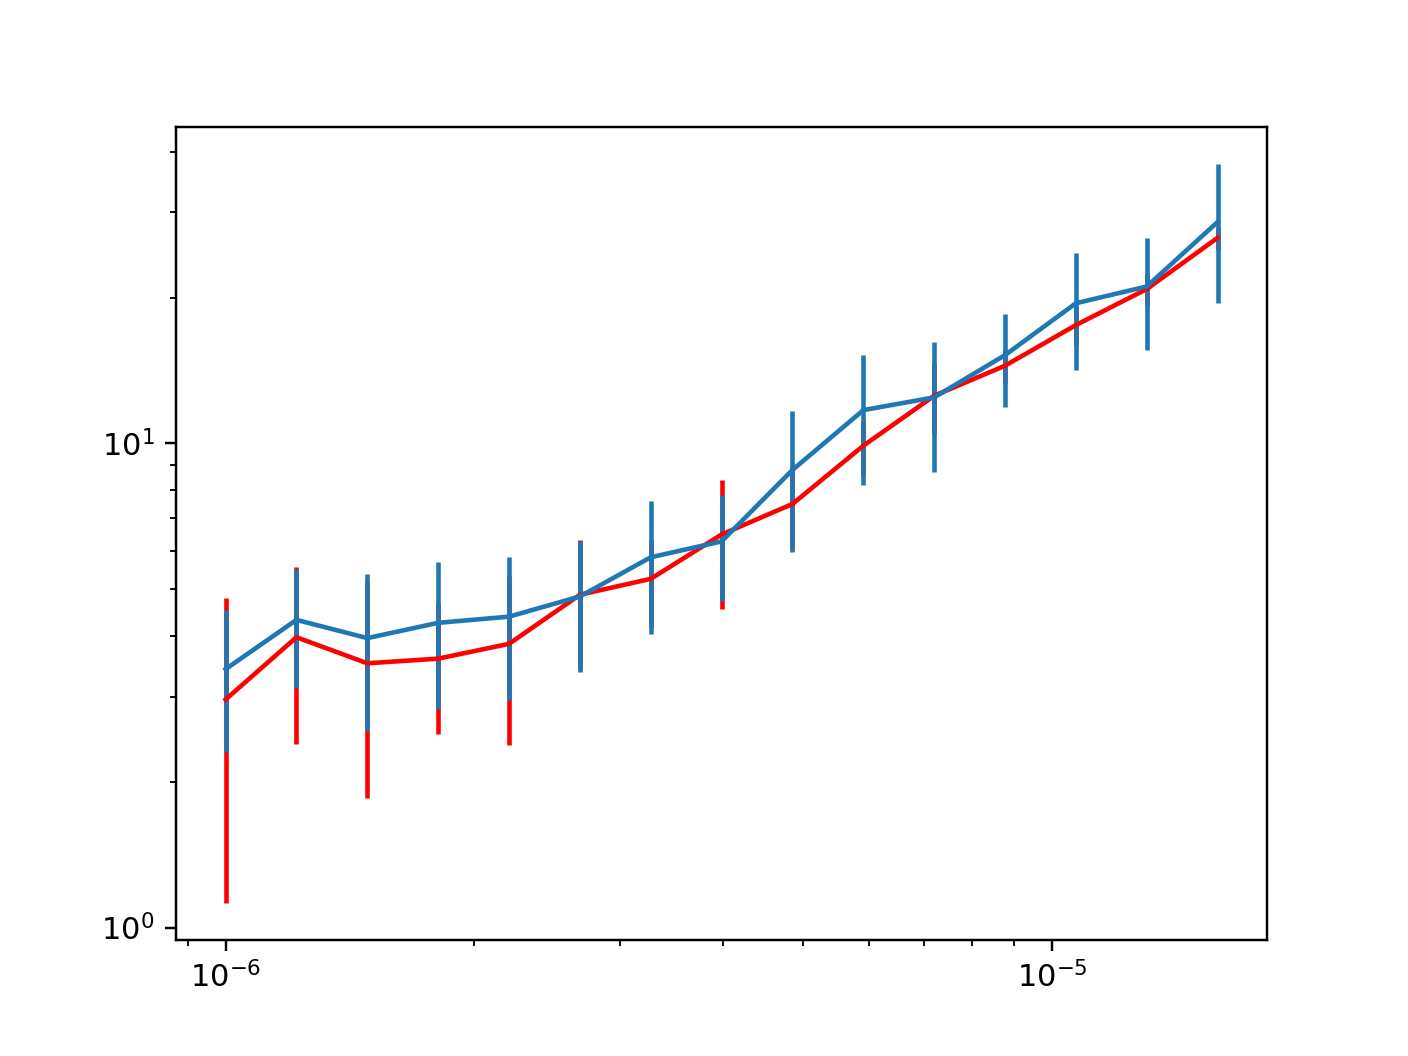

[]

In [38]:
figure()
errorbar(yarr,snr_stat[0,:,0],snr_stat[0,:,1],c="r")
errorbar(yarr,snr_stat[1,:,0],snr_stat[1,:,1])
loglog()